# WEEK 5 CHALLENGE - DATA EXPLORATION

## Contents
* Libraries
* Data and Features
* Data Exploration (Customer purchasing behavior)
* Dashboard

### Libraries


In [5]:
#importing the necessary libraries
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(style="darkgrid")
sns.set(font_scale=1.25)
%matplotlib inline

Saving store.csv to store.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


## Data and Features

In [6]:
#function to import the dataset
def import_data(data):
    data_imported = pd.read_csv(data)
    return data_imported

In [7]:
#importing the store data
store_data = import_data('store.csv')
store_data.name = 'Store'
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
#importing the train data
train_data = import_data('train.csv')
train_data.name = 'Train'
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
#importing the test data
test_data = import_data('test.csv')
test_data.name = 'Test'
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### Features Description
* **Id** - an Id that represents a (Store, Date) duple within the test set


* **Store** - a unique Id for each store


* **Sales** - the turnover for any given day (this is what you are predicting)


* **Customers** - the number of customers on a given day


* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open


* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None


* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools


* **StoreType** - differentiates between 4 different store models: a, b, c, d


* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended.


* **CompetitionDistance** - distance in meters to the nearest competitor store


* **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened


* **Promo** - indicates whether a store is running a promo on that day


* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating


* **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2


* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

## Data Exploration

### Functions

In [10]:
# function to ckeck the shape of a dataset
def data_shape(data):
    print(data.name,'shape:',data.shape)

# function to ckeck the size of a dataset
def data_size(data):
    print(data.name,'size:',data.size)

# function to ckeck the information of a dataset
def data_info(data):
    print(data.name,'information:')
    print('---------------------------------------------')
    print(data.info())
    print('---------------------------------------------')   
    
# function to get all unique values in the categorical variables
def unique_val(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == 'O':
            print('Unique values in',i,'are',data[i].unique())
            print('----------------------------------------------')

# function to ckeck for missing values
def missing_val(data):
    print('Sum of missing values in', data.name)
    print('------------------------------')
    print(data.isnull().sum())
    print('------------------------------')
    
"""
VISUALIZATION
"""
#function to set the figure size
def fig_size(x, y):
    plt.figure(figsize=(x,y))
    
# function to get the values in a plot
def get_value(figure):
    for p in figure.patches:
        figure.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')
        
# function to set figure parameters
def fig_att(figure, title, titlex, titley, size, sizexy, weight):
    #setting the parameters for the title, x and y labels of the plot
    figure.set_title(title, size=size, weight=weight)
    figure.set_xlabel(titlex, size=sizexy, weight=weight)
    figure.set_ylabel(titley, size=sizexy, weight=weight)
    
# function to set figure parameters
def fig_att2(title, titlex, titley, size, sizexy, weight):
    #setting the parameters for the title, x and y labels of the plot
    plt.title(title, size=size, weight=weight)
    plt.xlabel(titlex, size=sizexy, weight=weight)
    plt.ylabel(titley, size=sizexy, weight=weight)

# function to change rotation of the x axis tick labels
def rotate(figure, rotation):
    #changing the rotation of the x axis tick labels
    for item in figure.get_xticklabels():
        item.set_rotation(rotation)
        
# function to save figures
def save(name):
    plt.savefig(f"{name}.png")

### Shape and Size

In [11]:
# shape and size of the dataset
for data in [train_data,test_data,store_data]:
    data_shape(data)
    data_size(data)
    print('-----------------------')

Train shape: (1017209, 9)
Train size: 9154881
-----------------------
Test shape: (41088, 8)
Test size: 328704
-----------------------
Store shape: (1115, 10)
Store size: 11150
-----------------------


In [12]:
# information of dataset
for data in [train_data,test_data,store_data]:
    data_info(data)

Train information:
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
---------------------------------------------
Test information:
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  -----

In [13]:
#dealing with cardinality
train_data['StateHoliday'].replace({'0':'o',0:'o'}, inplace=True)
test_data['StateHoliday'].replace({'0':'o'}, inplace=True)

In [14]:
#converting the date column to datetime
train_data.Date = pd.to_datetime(train_data.Date)
test_data.Date = pd.to_datetime(test_data.Date)

### Unique values

In [15]:
# unique values of categorical variables            
for i in [train_data,test_data,store_data]:
    unique_val(i)

Unique values in StateHoliday are ['o' 'a' 'b' 'c']
----------------------------------------------
Unique values in StateHoliday are ['o' 'a']
----------------------------------------------
Unique values in StoreType are ['c' 'a' 'd' 'b']
----------------------------------------------
Unique values in Assortment are ['a' 'c' 'b']
----------------------------------------------
Unique values in PromoInterval are [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
----------------------------------------------


### Missing Values

In [16]:
# missing values in dataset
for data in [train_data,test_data,store_data]:
    missing_val(data)

Sum of missing values in Train
------------------------------
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
------------------------------
Sum of missing values in Test
------------------------------
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
------------------------------
Sum of missing values in Store
------------------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
------------------------------


In [17]:
#handling missing values
missing_col = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
               'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

for col in missing_col:
    store_data[col].fillna(store_data[col].mode()[0], inplace=True)
    
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)

store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [18]:
#handling missing values
test_data['Open'].fillna(test_data['Open'].mode()[0], inplace=True)

test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,o,0
1,2,3,4,2015-09-17,1.0,1,o,0
2,3,7,4,2015-09-17,1.0,1,o,0
3,4,8,4,2015-09-17,1.0,1,o,0
4,5,9,4,2015-09-17,1.0,1,o,0


### Identifying and Handling Outliers

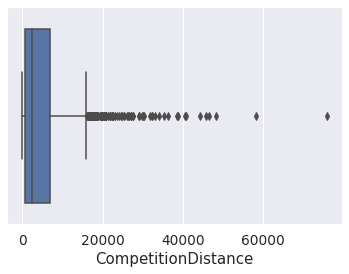

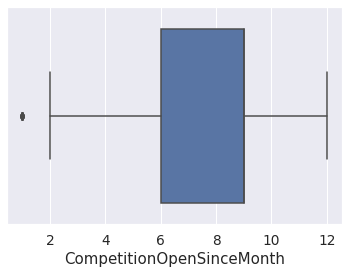

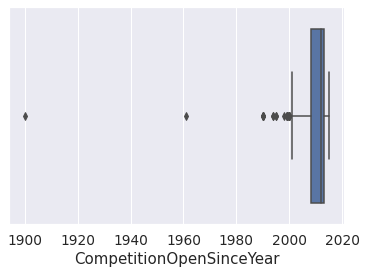

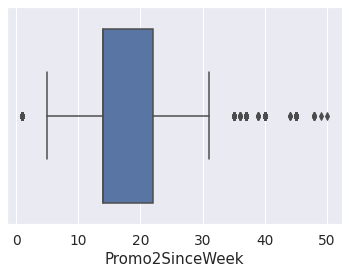

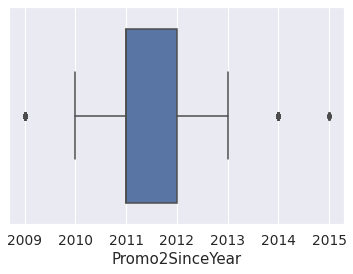

In [19]:
#identifying outliers
out_col = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
           'Promo2SinceWeek', 'Promo2SinceYear']
for col in out_col:
    ax = sns.boxplot(store_data[col])
    plt.savefig(f"{col}.png")
    plt.show()

In [20]:
# merging the train and store data
train_store = pd.merge(train_data, store_data, on='Store')
train_store.name = 'Combined'
#train_store.to_csv('combined.csv', index=False)
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,5020,546,1,1,o,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,4782,523,1,1,o,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,5011,560,1,1,o,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,6102,612,1,1,o,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


### Seasonality

In [21]:
season_data = train_data[['Date','Sales']]
season_data = season_data.set_index('Date')
season_data.head()

,Sales
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


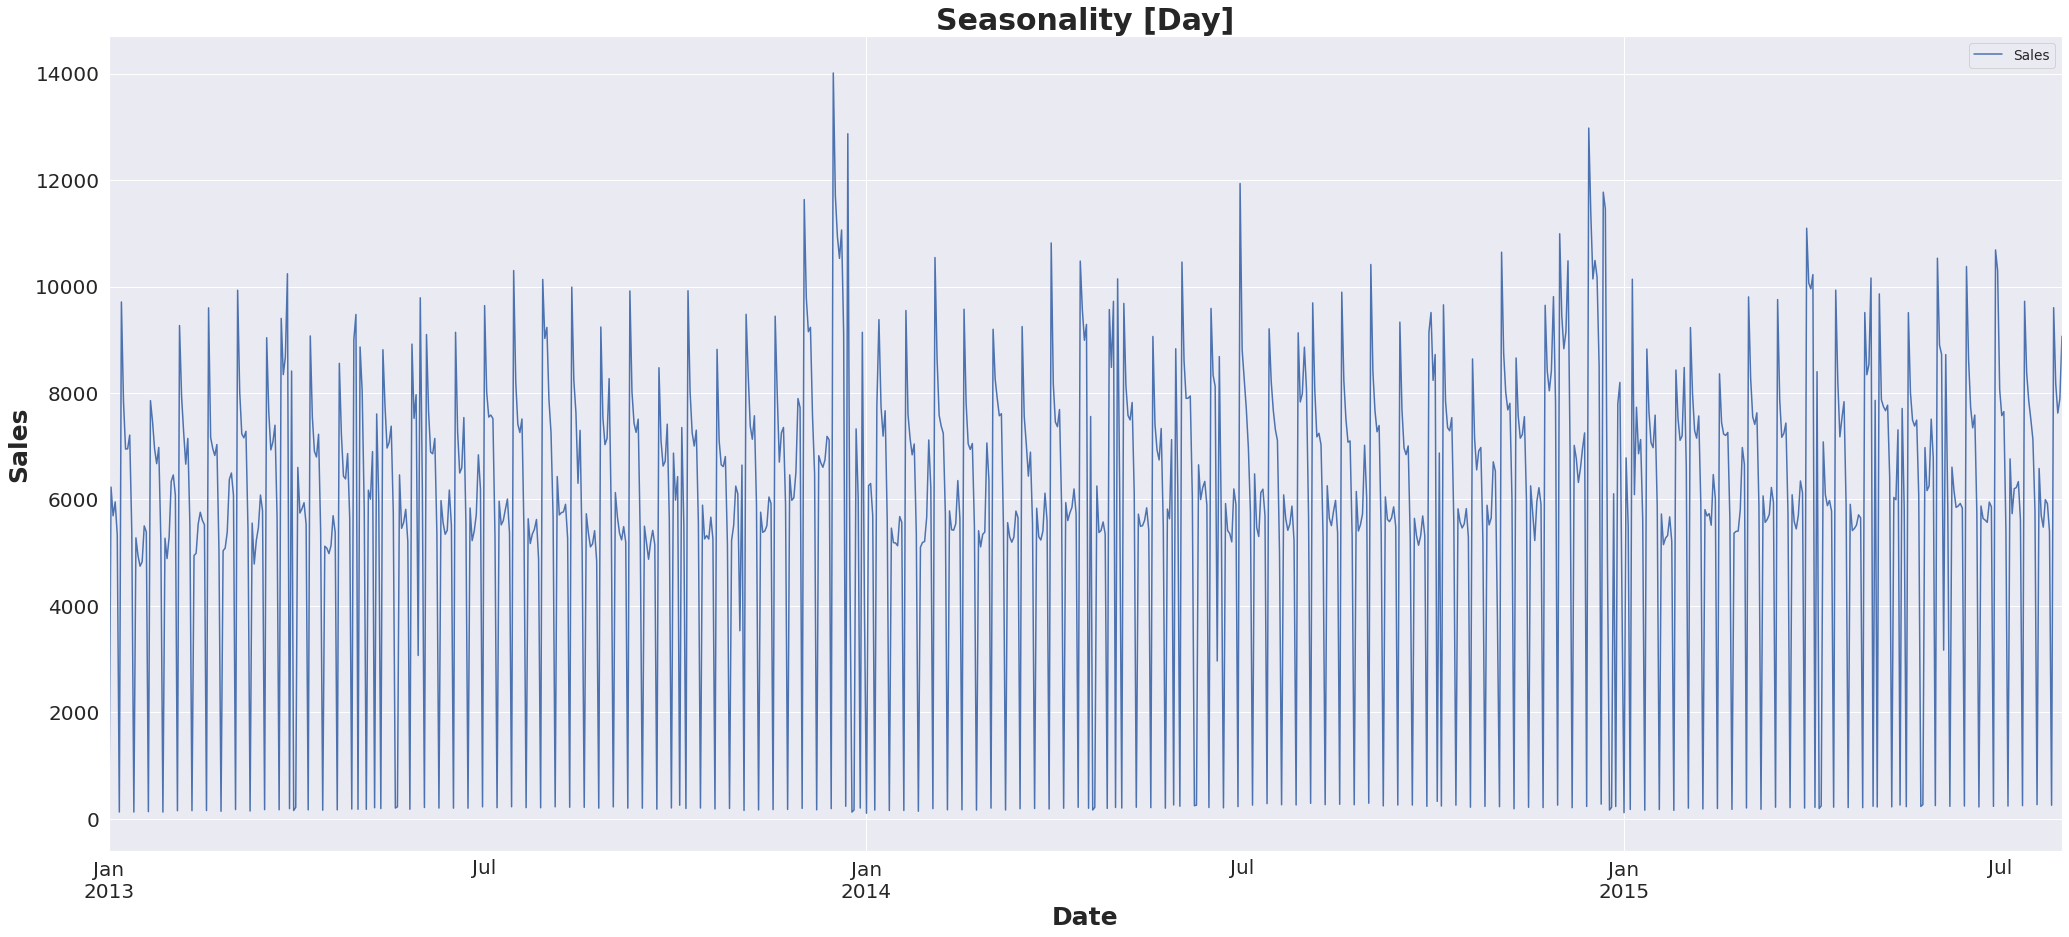

In [22]:
season_data_day = season_data.resample('D').mean()
ax = season_data_day.plot(figsize=(35,15), fontsize=20)

#setting the figure parameters
fig_att(ax, "Seasonality [Day]", 
        "Date", "Sales", 30, 25, "bold")

#saving the figure
plt.savefig('day.png')
plt.show()

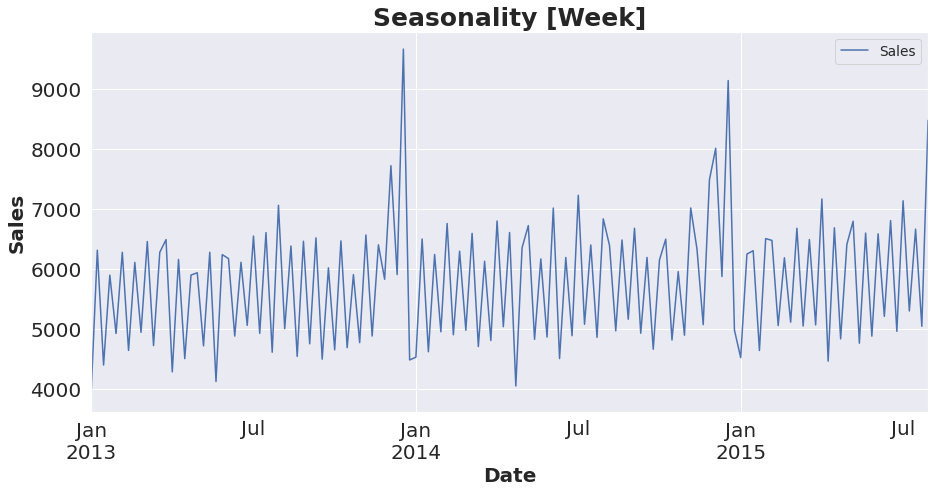

In [24]:
season_data_week = season_data.resample('W').mean()

ax = season_data_week.plot(figsize=(15,7), fontsize=20)

#setting the figure parameters
fig_att(ax, "Seasonality [Week]", 
        "Date", "Sales", 25, 20, "bold")

#saving the figure
plt.savefig('week.png')
plt.show()

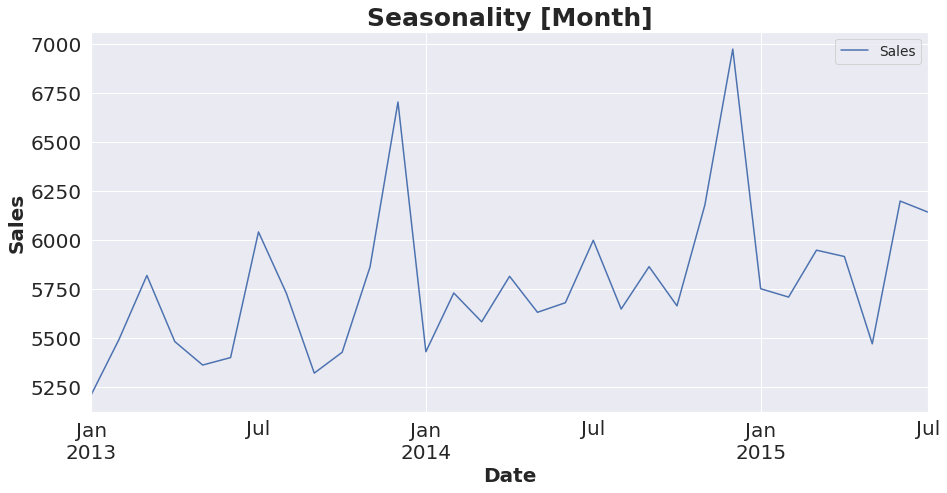

In [25]:
season_data_month = season_data.resample('M').mean()

ax = season_data_month.plot(figsize=(15,7), fontsize=20)

#setting the figure parameters
fig_att(ax, "Seasonality [Month]", 
        "Date", "Sales", 25, 20, "bold")

#saving the figure
save('month')
plt.show()

In [26]:
train_data['year'] = train_data.Date.apply(lambda x: x.year )
train_data['month'] = train_data.Date.apply(lambda x: x.month)
train_data['dow'] = train_data.Date.apply(lambda x: x.dayofweek )
train_data['day_name'] = train_data.Date.apply(lambda x: x.day_name() )
train_data['month_name'] = train_data.Date.apply(lambda x: x.month_name() )
train_data['doy'] = train_data.Date.apply(lambda x: x.dayofyear )
train_data['quarter'] = train_data.Date.apply(lambda x: x.quarter )
train_data['month_start'] = train_data.Date.apply(lambda x: x.is_month_start )
train_data['month_end'] = train_data.Date.apply(lambda x: x.is_month_end )

test_data['year'] = test_data.Date.apply(lambda x: x.year )
test_data['month'] = test_data.Date.apply(lambda x: x.month)
test_data['dow'] = test_data.Date.apply(lambda x: x.dayofweek )
test_data['doy'] = test_data.Date.apply(lambda x: x.dayofyear )
test_data['quarter'] = test_data.Date.apply(lambda x: x.quarter )
test_data['month_start'] = test_data.Date.apply(lambda x: x.is_month_start )
test_data['month_end'] = test_data.Date.apply(lambda x: x.is_month_end )

In [27]:
train_store['year'] = train_store.Date.apply(lambda x: x.year)
train_store['month'] = train_store.Date.apply(lambda x: x.month)
train_store['day_name'] = train_store.Date.apply(lambda x: x.day_name() )
train_store['month_name'] = train_store.Date.apply(lambda x: x.month_name() )

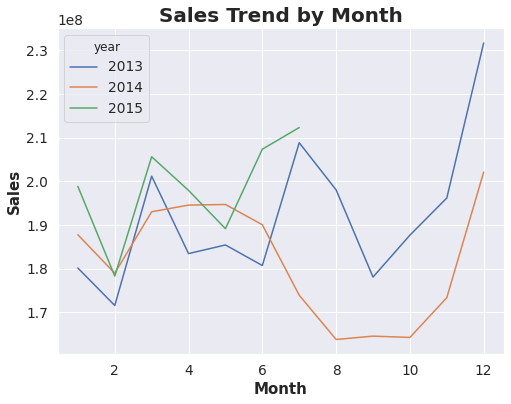

In [28]:
ax = pd.crosstab(train_data.year,train_data.month,values= train_data.Sales, aggfunc= np.sum).T.plot(figsize=(8,6))
#setting the figure parameters
fig_att(ax, "Sales Trend by Month", 
        "Month", "Sales", 20, 15, "bold")

#saving the figure
save('month_trend')
plt.show()

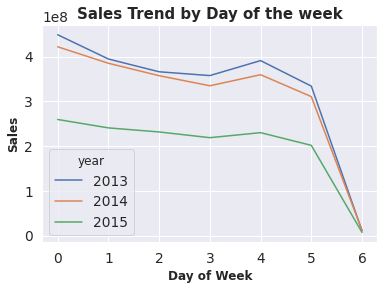

In [29]:
ax = pd.crosstab(train_data.year, train_data.dow, values=train_data.Sales, 
                 aggfunc=np.sum).T.plot();
#setting the figure parameters
fig_att(ax, "Sales Trend by Day of the week", 
        "Day of Week", "Sales", 15, 12, "bold")

#saving the figure
save('day_trend')
plt.show()

### Sales and Holidays

In [30]:
#getting the total sales when there's holiday and when there's no holiday
hol_sales = train_data.groupby('SchoolHoliday', sort=False)['Sales'].agg(['sum'])
hol_sales

,sum
SchoolHoliday,
1,1176920092
0,4696260531


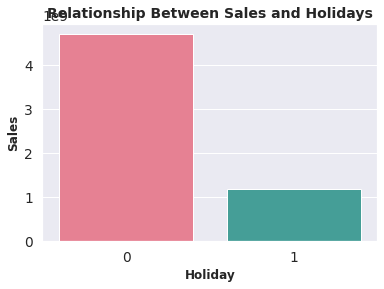

In [31]:
#resetting the index
hol_sales = hol_sales.reset_index()

#barplot for visualization
ax = sns.barplot('SchoolHoliday', 'sum', 
                 palette='husl', data=hol_sales)

#setting the figure parameters
fig_att(ax, "Relationship Between Sales and Holidays", 
        "Holiday", "Sales", 14, 12, "bold")

save('hol_sales')
plt.show()

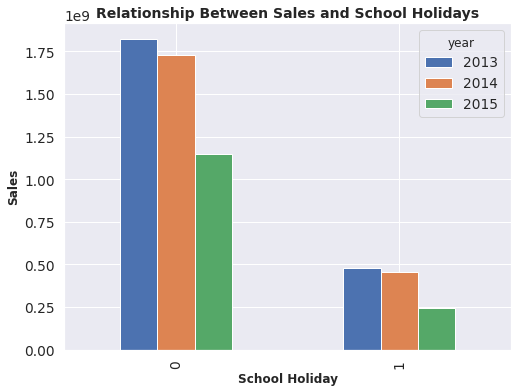

In [32]:
ax = pd.crosstab(train_data.year, train_data.SchoolHoliday, values= train_data.Sales, 
                 aggfunc= np.sum).T.plot(kind='bar', figsize=(8,6))
#setting the figure parameters
fig_att(ax, "Relationship Between Sales and School Holidays", 
        "School Holiday", "Sales", 14, 12, "bold")

save('hol_sales2')
plt.show()

### Seasonal Purchase Behavior

In [33]:
#getting the total sales and customers for each seasonal holiday
season_behavior = train_data.groupby('StateHoliday', sort=False)['Sales'].agg(['sum'])
season_behavior.columns = ['Sales']
season_behavior

,Sales
StateHoliday,
o,5865164768
a,5890305
b,1433744
c,691806


In [34]:
#dropping the row where state holiday is 'o'
season_behavior = season_behavior.drop('o')
season_behavior

,Sales
StateHoliday,
a,5890305
b,1433744
c,691806


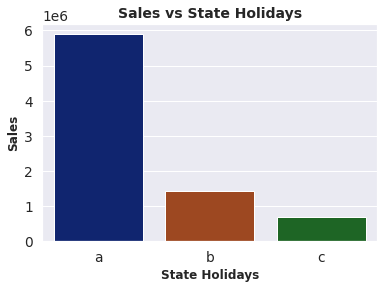

In [35]:
#visualization
season_behavior = season_behavior.reset_index()

#barplot sublopts for visualization - Sales and customer
ax = sns.barplot('StateHoliday', 'Sales', palette='dark', 
                 data=season_behavior)

#setting the figure parameters
fig_att(ax, "Sales vs State Holidays", 
        "State Holidays", "Sales", 14, 12, "bold")

#saving the figure
save('season_behavior')
plt.show()

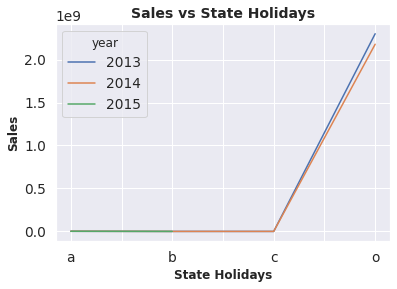

In [36]:
ax = pd.crosstab(train_data.year,train_data.StateHoliday,
                 values= train_data.Sales, aggfunc= np.sum).T.plot()
#setting the figure parameters
fig_att(ax, "Sales vs State Holidays", 
        "State Holidays", "Sales", 14, 12, "bold")

#saving the figure
save('season_behavior2')
plt.show()

### Sales and Customers - Correlation

Correlation between Sales & Customers = 0.8947107733017032


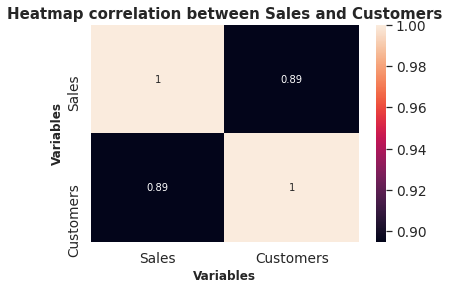

In [37]:
# finding the correlation between sales and customers
correlation = train_data['Sales'].corr(train_data['Customers'])
print(f"Correlation between Sales & Customers = {correlation}")

# using heatmap to visualize correlation
ax = sns.heatmap(train_data[['Sales', 'Customers']].corr(), annot=True)

# setting the parameters
fig_att(ax, "Heatmap correlation between Sales and Customers", 
        "Variables", "Variables", 15, 12, "bold")
save("correlation")
plt.show()

### Promo vs Sales and Customers

In [38]:
# getting the total sales and customers when there's promo and no promo
promo = train_data.groupby('Promo', sort=False)['Sales', 'Customers'].agg(['sum'])
promo.columns = ['Sales', 'Customers']
promo

,Sales,Customers
Promo,,
1,3101206286,318263948
0,2771974337,325777807


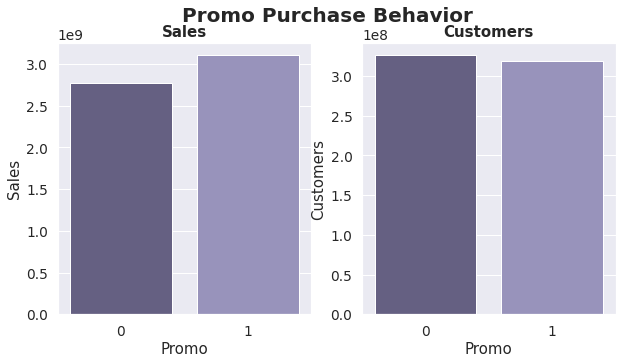

In [39]:
#visualization
promo = promo.reset_index()

#barplot sublopts for visualization - Sales and customer
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Promo Purchase Behavior', size=20, weight='bold')

sns.barplot('Promo', 'Sales', palette='Purples_d', 
             data=promo, ax=axes[0])
axes[0].set_title('Sales', size=15, weight='bold')

sns.barplot('Promo', 'Customers', palette='Purples_d', 
             data=promo, ax=axes[1])
axes[1].set_title('Customers', size=15, weight='bold')

#saving the figure
save('promo')
plt.show()

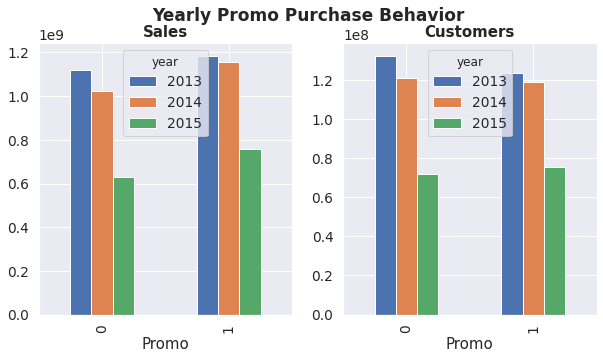

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Yearly Promo Purchase Behavior', size=17, weight='bold')

pd.crosstab(train_data.year, train_data.Promo, values= train_data.Sales, 
            aggfunc= np.sum).T.plot(kind='bar', ax=axes[0])
axes[0].set_title('Sales', size=15, weight='bold')

pd.crosstab(train_data.year, train_data.Promo, values= train_data.Customers, 
            aggfunc= np.sum).T.plot(kind='bar', ax=axes[1])
axes[1].set_title('Customers', size=15, weight='bold')

#saving the figure
save('promo2')
plt.show()

In [41]:
# getting the total sales and customers when there's promo and no promo
promo2 = train_store.groupby('Promo2', sort=False)['Sales', 'Customers'].agg(['sum'])
promo2.columns = ['Sales', 'Customers']
promo2

,Sales,Customers
Promo2,,
0,3111542628,357125490
1,2761637995,286916265


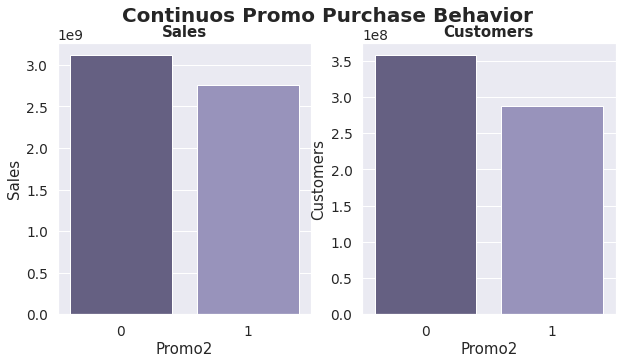

In [42]:
#visualization
promo2 = promo2.reset_index()

#barplot sublopts for visualization - Sales and customer
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Continuos Promo Purchase Behavior', size=20, weight='bold')

sns.barplot('Promo2', 'Sales', palette='Purples_d', 
             data=promo2, ax=axes[0])
axes[0].set_title('Sales', size=15, weight='bold')

sns.barplot('Promo2', 'Customers', palette='Purples_d', 
             data=promo2, ax=axes[1])
axes[1].set_title('Customers', size=15, weight='bold')

#saving the figure
save('promo3')
plt.show()

### Promos and Stores

In [43]:
"""
getting the total sales and customers for each store type 
when there's a promo or not
"""
promo_stores = train_store.groupby(['StoreType', 'Promo'])['Sales','Customers'].agg(['sum'])
promo_stores.columns = ['Sales', 'Customers']
promo_stores

Sales  Customers
StoreType Promo                       
a         0      1466971549  180276608
          1      1698363310  183264826
b         0        92061910   18685985
          1        67169485   12779636
c         0       375186657   47222206
          1       408034769   44907499
d         0       837754221   79593008
          1       927638722   77311987

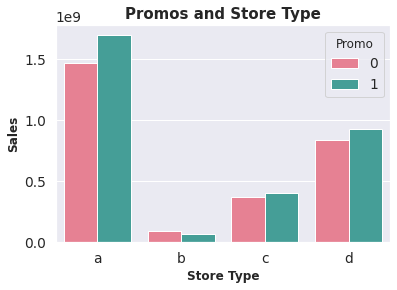

In [44]:
#resetting the index
promo_stores = promo_stores.reset_index()

#barplot for visualization
ax = sns.barplot('StoreType', 'Sales', hue='Promo',
                 palette='husl', data=promo_stores)

#setting the figure parameters
fig_att(ax, "Promos and Store Type", 
        "Store Type", "Sales", 15, 12, "bold")

save('promo_stores')
plt.show()

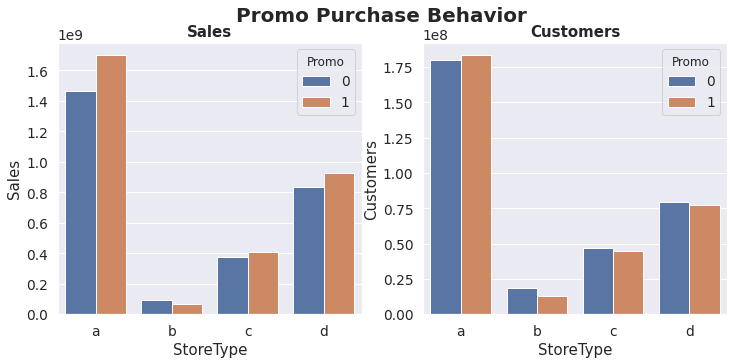

In [45]:
#visualization
promo_stores = promo_stores.reset_index()

#barplot sublopts for visualization - Sales and customer
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Promo Purchase Behavior', size=20, weight='bold')

sns.barplot('StoreType', 'Sales', palette='deep', hue='Promo',
             data=promo_stores, ax=axes[0])
axes[0].set_title('Sales', size=15, weight='bold')

sns.barplot('StoreType', 'Customers', palette='deep', hue='Promo',
             data=promo_stores, ax=axes[1])
axes[1].set_title('Customers', size=15, weight='bold')

#saving the figure
save('promo_stores2')
plt.show()

In [46]:
"""
getting the total sales and customers for each store type 
when there's a promo or not
"""
promo2_stores = train_store.groupby(['StoreType', 'Promo2'])['Sales','Customers'].agg(['sum'])
promo2_stores.columns = ['Sales', 'Customers']
promo2_stores

Sales  Customers
StoreType Promo2                       
a         0       1755740109  207054433
          1       1409594750  156487001
b         0        123336200   23082050
          1         35895195    8383571
c         0        435035980   52461014
          1        348185446   39668691
d         0        797430339   74527993
          1        967962604   82377002

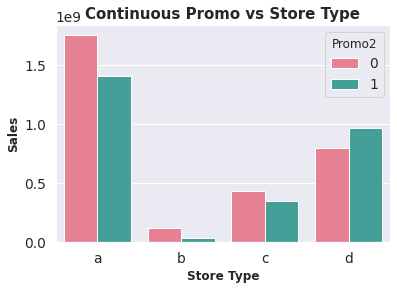

In [47]:
#resetting the index
promo2_stores = promo2_stores.reset_index()

#barplot for visualization
ax = sns.barplot('StoreType', 'Sales', hue='Promo2',
                 palette='husl', data=promo2_stores)

#setting the figure parameters
fig_att(ax, "Continuous Promo vs Store Type", 
        "Store Type", "Sales", 15, 12, "bold")

save('promo2_stores')
plt.show()

### Customers Trend

In [48]:
""" 
Getting the total sales and customers for each date
when the store is opened or not
"""
open_trend = train_data.groupby('Date', sort=False)['Sales', 'Customers'].agg(['sum'])
open_trend.columns = ['Sales', 'Customers']
open_trend.head()

,Sales,Customers
Date,,
2015-07-31,10109742,968620
2015-07-30,8798854,858547
2015-07-29,8499962,828524
2015-07-28,9115073,876092
2015-07-27,10707292,970462


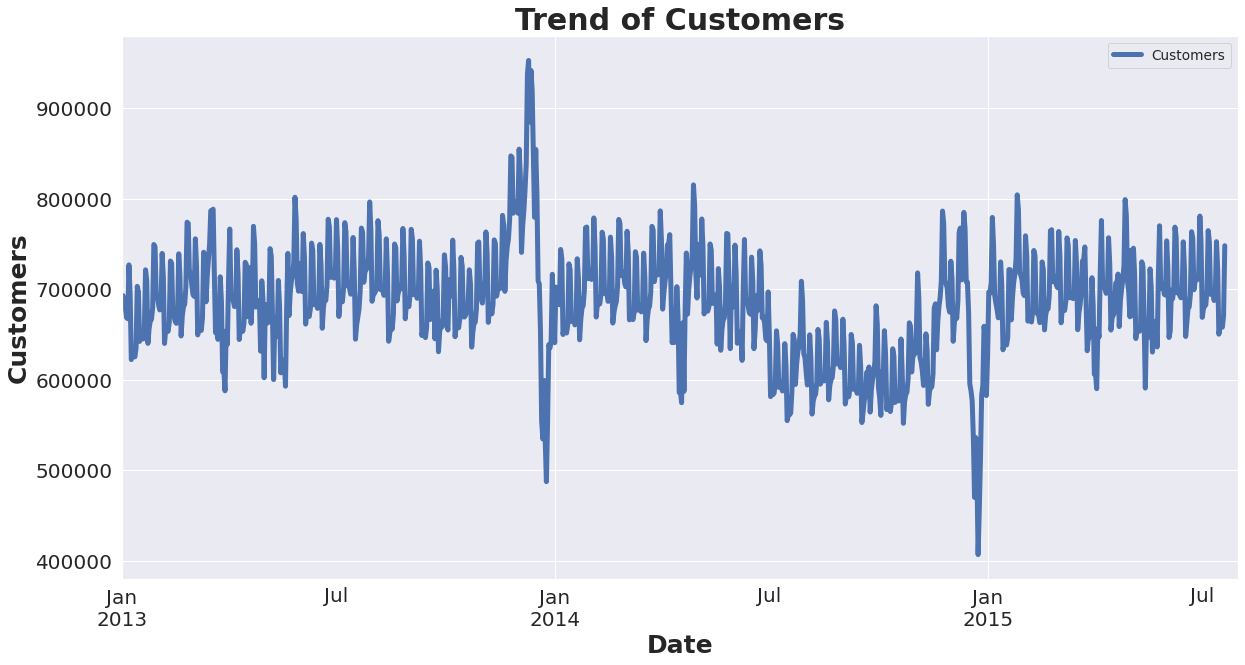

In [49]:
# time series to show the trend of customers over time
ax = open_trend[['Customers']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

#setting the figure parameters
fig_att(ax, "Trend of Customers", 
        "Date", "Customers", 30, 25, "bold")

#rotating the x-axis ticklabels
rotate(ax, 0)
#saving the figure
save('trend')
plt.show()

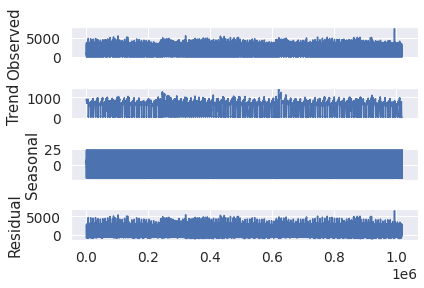

In [50]:
def decompose(series, period):
    result = seasonal_decompose(series, model='additive', freq=365)
    result.plot()
    plt.show()
    return result.seasonal


cust =  decompose(train_data.Customers, 12)

### Stores, Weekdays, Weekends,  and Sales

In [51]:
"""
Getting the total sales for each store type and every day of the week
when the store is opened or not.
"""
week_sales = train_store.groupby(['StoreType', 'DayOfWeek', 'Open'])['Sales'].agg(['sum'])
week_sales.columns = ['Sales']
week_sales.head()

Sales
StoreType DayOfWeek Open           
a         1         0             0
                    1     621955243
          2         0             0
                    1     569806300
          3         0             0

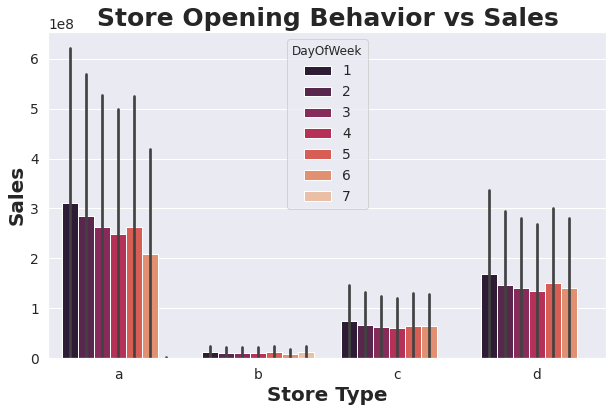

In [52]:
#resetting the index
week_sales = week_sales.reset_index()

#barplot for visualization
plt.figure(figsize=(10,6))
ax = sns.barplot('StoreType', 'Sales', hue='DayOfWeek',
                 palette='rocket', data=week_sales)

#setting the figure parameters
fig_att(ax, "Store Opening Behavior vs Sales", 
        "Store Type", "Sales", 25, 20, "bold")

save('week_sales')
plt.show()

### Assortment Type vs Sales

In [53]:
# Getting the total sales for each assortment type
assort_sales = train_store.groupby('Assortment')['Sales'].agg(['sum'])
assort_sales.columns = ['Sales']
assort_sales 

,Sales
Assortment,
a,2945750070
b,70946312
c,2856484241


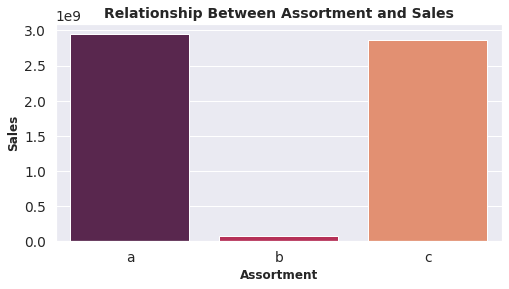

In [54]:
#resetting the index
assort_sales = assort_sales.reset_index()

#barplot for visualization
fig_size(8,4)
ax = sns.barplot('Assortment', 'Sales', 
                 palette='rocket', data=assort_sales)

#setting the figure parameters
fig_att(ax, "Relationship Between Assortment and Sales", 
        "Assortment", "Sales", 14, 12, "bold")

save('assort_sales')
plt.show()

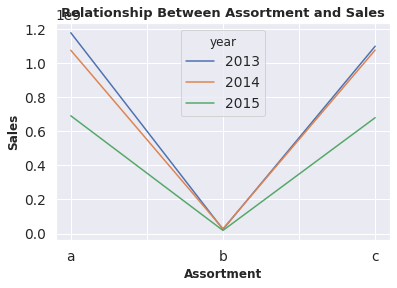

In [55]:
ax = pd.crosstab(train_store.year, train_store.Assortment, 
                 values=train_store.Sales, aggfunc=np.sum).T.plot()
#setting the figure parameters
fig_att(ax, "Relationship Between Assortment and Sales", 
        "Assortment", "Sales", 13, 12, "bold")

save('assort_sales2')
plt.show()

In [56]:
# Getting the total sales for each assortment type
assort_sales2 = train_store.groupby(['StoreType','Assortment'])['Sales'].agg(['sum'])
assort_sales2.columns = ['Sales']
assort_sales2 

Sales
StoreType Assortment            
a         a           1870105131
          c           1295229728
b         a             71357761
          b             70946312
          c             16927322
c         a            400260421
          c            382961005
d         a            604026757
          c           1161366186

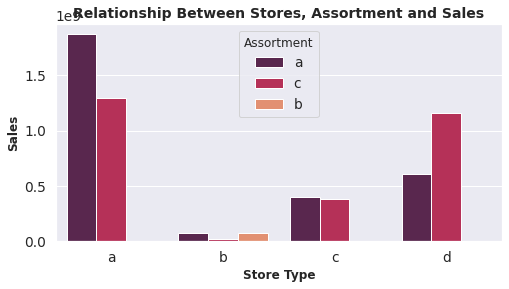

In [57]:
#resetting the index
assort_sales2 = assort_sales2.reset_index()

#barplot for visualization
fig_size(8,4)
ax = sns.barplot('StoreType', 'Sales', hue='Assortment',
                 palette='rocket', data=assort_sales2)

#setting the figure parameters
fig_att(ax, "Relationship Between Stores, Assortment and Sales", 
        "Store Type", "Sales", 14, 12, "bold")

save('assort_sales2')
plt.show()

### Competitor vs Sales

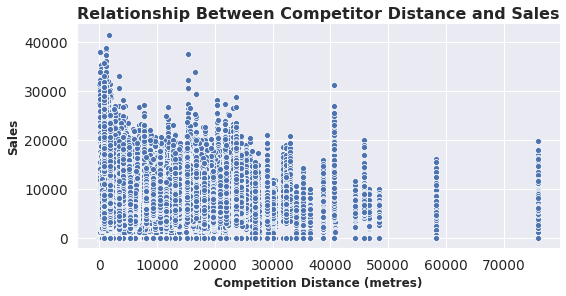

In [58]:
#scatterplot for visualization
ax = sns.relplot('CompetitionDistance', 'Sales', kind='scatter',
                 height=4, aspect=2, data=train_store)

#setting the figure parameters
fig_att2("Relationship Between Competitor Distance and Sales", 
          "Competition Distance (metres)", "Sales", 16, 12, "bold")

save('comp_sales')
plt.show()

In [59]:
train_store['Distance_In_Kilometer'] = 0.001 * train_store.CompetitionDistance

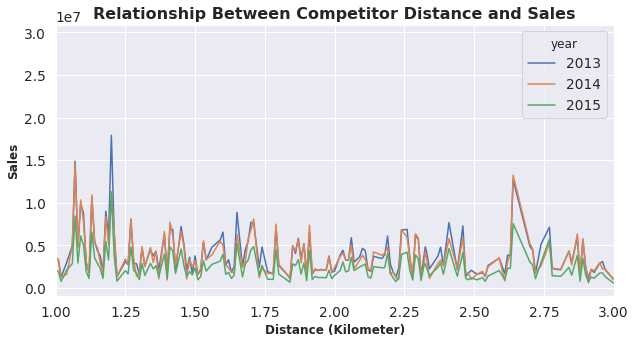

In [60]:
pd.crosstab(train_store.year, train_store.Distance_In_Kilometer, 
            values=train_store.Sales, aggfunc=np.sum).T.plot(figsize=(10,5))
plt.xlim([1,3])
#setting the figure parameters
fig_att2("Relationship Between Competitor Distance and Sales", 
          "Distance (Kilometer)", "Sales", 16, 12, "bold")

save('comp_sales2')
plt.show()

### Correlation between Data Features

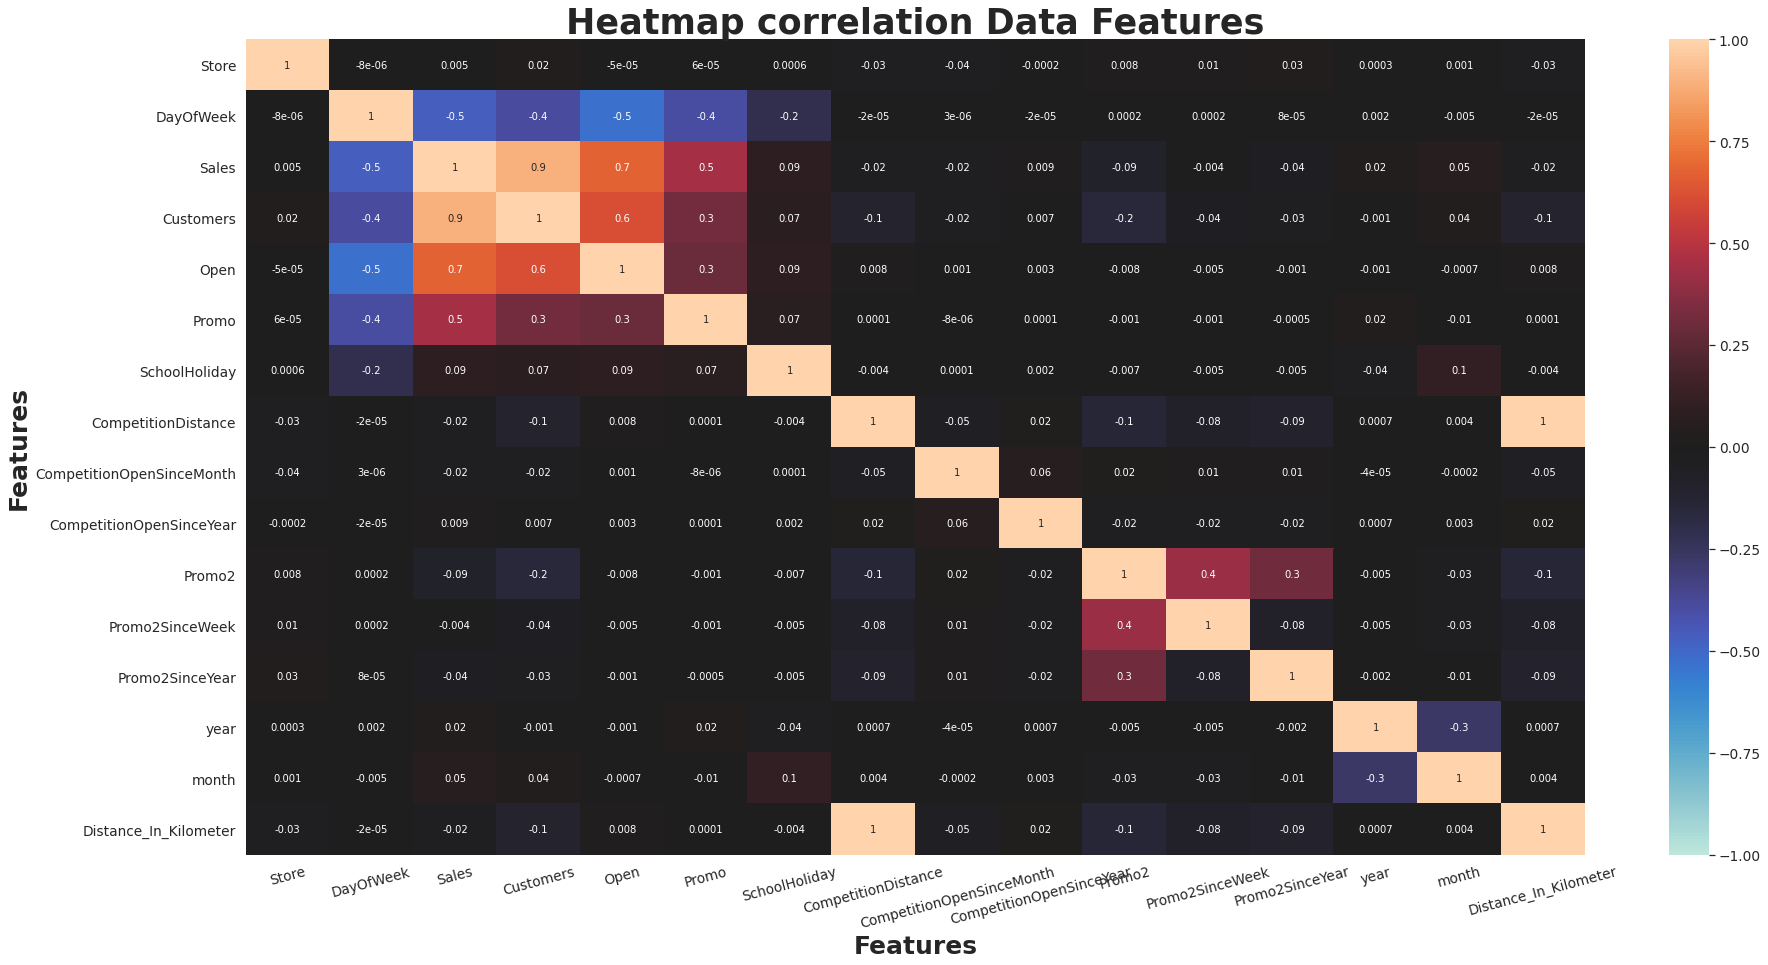

In [61]:
# using heatmap to visualize correlation
fig_size(30,15)
ax = sns.heatmap(train_store.corr(), annot=True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)

# setting the parameters
fig_att(ax, "Heatmap correlation Data Features", 
        "Features", "Features", 35, 25, "bold")

# rotating the xtick labels
rotate(ax, 15)

#saving the figure
save('data_heatmap')
plt.show()

#### Sales and Other Features

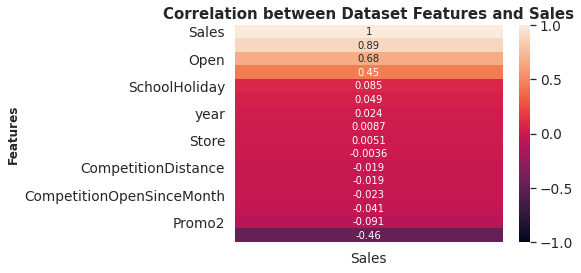

In [63]:
# getting the correlation between the data features
sales_corr = train_store.corr()

# using heatmap to visualize the correlation between sales and other features in the dataset
#figsize=(10,15)
ax = sns.heatmap(sales_corr[['Sales']].sort_values(by=['Sales'],ascending=False),
                vmin=-1,
                annot=True);

# setting the parameters
fig_att(ax, "Correlation between Dataset Features and Sales", 
        "", "Features", 15, 12, "bold")

#saving the figure
save('sales_corr2')
plt.show()

### Dashboard Integration

In [2]:
# embedding the tableau dashboard
%%html
<div class='tableauPlaceholder' id='viz1598112113149' style='position: relative'>
  <noscript>
    <a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalesCustomerDashboard&#47;SalesDashboard&#47;1_rss.png' style='border: none' /></a>
  </noscript>
  <object class='tableauViz'  style='display:none;'>
    <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
    <param name='embed_code_version' value='3' /> 
    <param name='site_root' value='' />
    <param name='name' value='SalesCustomerDashboard&#47;SalesDashboard' />
    <param name='tabs' value='yes' />
    <param name='toolbar' value='yes' />
    <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalesCustomerDashboard&#47;SalesDashboard&#47;1.png' /> 
    <param name='animate_transition' value='yes' />
    <param name='display_static_image' value='yes' />
    <param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' />
    <param name='display_count' value='yes' />
    <param name='language' value='en' />
  </object>
</div>                
<script type='text/javascript'>                    
  var divElement = document.getElementById('viz1598112113149');                    
  var vizElement = divElement.getElementsByTagName('object')[0];                    
  if ( divElement.offsetWidth > 800 ) 
  { 
    vizElement.style.width='1000px';vizElement.style.height='850px';
  } 
  else if ( divElement.offsetWidth > 500 ) 
  { 
    vizElement.style.width='1000px';vizElement.style.height='850px';
  } 
  else 
  { 
    vizElement.style.width='100%';vizElement.style.height='2000px';
  }                     
  var scriptElement = document.createElement('script');                    
  scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
  vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>